<a href="https://colab.research.google.com/github/yshungria-uniandes/Data-Science-Fundamentals-/blob/main/Examen_de_certificaci%C3%B3n_%E2%80%93_Intento_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos de Data Science

## Analizando los Salarios en Ciencia de Datos en 2023

### Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

El dataset puede ser encontrado aquí.

[Dataset Salaries 2023 ](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023)



In [2]:
# Importar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd

ruta = '/content/drive/MyDrive/DataSets/ds_salaries.csv'
df = pd.read_csv(ruta)
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


## Limpieza de datos con Python:

a . Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.

b . Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [52]:
duplicados = df.duplicated().sum()
df_limpio = df.drop_duplicates()

In [54]:
data_types = df_limpio.dtypes

duplicados, data_types

(1171,
 work_year              int64
 experience_level      object
 employment_type       object
 job_title             object
 salary                 int64
 salary_currency       object
 salary_in_usd          int64
 employee_residence    object
 remote_ratio           int64
 company_location      object
 company_size          object
 dtype: object)

# Conclusion:  

Se identificaron y eliminaron 1,171 registros duplicados del dataset, garantizando la unicidad de los datos.

Los tipos de datos han sido revisados y son correctos:

Variables categóricas: tipo object.
Variables numéricas: tipo int64.

c. Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).

In [55]:
columnas_categoricas = ['experience_level', 'employment_type', 'job_title',
                       'salary_currency', 'employee_residence',
                       'company_location', 'company_size']

valores_unicos = {col: df_limpio[col].unique() for col in columnas_categoricas}

valores_unicos

{'experience_level': array(['SE', 'MI', 'EN', 'EX'], dtype=object),
 'employment_type': array(['FT', 'CT', 'FL', 'PT'], dtype=object),
 'job_title': array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
        'Applied Scientist', 'Data Analyst', 'Data Modeler',
        'Research Engineer', 'Analytics Engineer',
        'Business Intelligence Engineer', 'Machine Learning Engineer',
        'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
        'Data Quality Analyst', 'Compliance Data Analyst',
        'Data Architect', 'Applied Machine Learning Engineer',
        'AI Developer', 'Research Scientist', 'Data Analytics Manager',
        'Business Data Analyst', 'Applied Data Scientist',
        'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
        'Head of Data', 'Data Science Manager', 'Data Manager',
        'Machine Learning Researcher', 'Big Data Engineer',
        'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
        'Dire

## Conclusion:

Los valores de las columnas categóricas son uniformes y consistentes, sin presentar variaciones atípicas, problemas de capitalización ni errores tipográficos.

d. Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

In [56]:
valores_na = df_limpio.isna().sum()
valores_na

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [57]:
valores_nulos = df_limpio.isnull().sum()
valores_nulos

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


e. Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [70]:
salary_usd_describe = df_limpio['salary_in_usd'].describe()

salary_usd_describe

,salary_in_usd
count,2553.000000
mean,130649.243635
std,62501.583165
min,5132.000000
25%,84053.000000
50%,128875.000000
75%,174000.000000
max,310000.000000


In [71]:
# Obtener estadísticas descriptivas del salario por nivel de experiencia (USD)
salary_by_experience_usd = df_limpio.groupby('experience_level')['salary_in_usd'].describe()

# Mejorar la presentación de los resultados con un formato más estructurado
print("Estadísticas Descriptivas del Salario por Nivel de Experiencia (USD):\n")
print(salary_by_experience_usd)


# También puedes mostrar de manera más legible los promedios y salarios máximos
average_salary = salary_by_experience_usd['mean']
max_salary = salary_by_experience_usd['max']

print("\nPromedio de Salarios por Nivel de Experiencia:")
print(average_salary)
print("\nSalario Máximo por Nivel de Experiencia:")
print(max_salary)

# Si deseas agregar más detalles sobre los outliers, puedes calcular los valores atípicos en base a los cuartiles:
Q1 = salary_by_experience_usd['25%']
Q3 = salary_by_experience_usd['75%']
IQR = Q3 - Q1

print("\nRango Intercuartílico (IQR) y posibles valores atípicos:")
for level in salary_by_experience_usd.index:
    print(f"\nNivel: {level}")
    print(f"IQR: {IQR[level]:.2f}")
    print(f"Valor inferior: {Q1[level] - 1.5 * IQR[level]:.2f}")
    print(f"Valor superior: {Q3[level] + 1.5 * IQR[level]:.2f}")


Estadísticas Descriptivas del Salario por Nivel de Experiencia (USD):

                   count           mean           std      min       25%  \
experience_level                                                           
EN                 269.0   71803.513011  49820.514123   5409.0   31520.0   
EX                  90.0  180907.866667  60230.085353  15000.0  140461.5   
MI                 659.0   99651.509863  50964.294641   5132.0   62000.0   
SE                1535.0  151322.684691  56078.079904   8000.0  110600.0   

                       50%       75%       max  
experience_level                                
EN                 61800.0  100000.0  250000.0  
EX                181080.0  220750.0  310000.0  
MI                 95000.0  130400.0  280700.0  
SE                147100.0  189575.0  310000.0  

Promedio de Salarios por Nivel de Experiencia:
experience_level
EN     71803.513011
EX    180907.866667
MI     99651.509863
SE    151322.684691
Name: mean, dtype: float64

Salar

## Conclusion:

En el análisis de las estadísticas descriptivas de los salarios por nivel de experiencia, se observa que los salarios en los niveles Entry Level (EN) y Mid Level (MI) tienen una gran dispersión, con salarios mínimos relativamente bajos (hasta 5,409 USD), lo que podría indicar la presencia de datos erróneos o excepcionales. Los Senior (SE) y Executive (EX) presentan salarios más altos, con un salario máximo de hasta 310,000 USD, lo cual es adecuado para estos niveles.

Sin embargo, los valores extremos, como los salarios negativos o demasiado bajos en los niveles EN y MI, sugieren que se deben corregir los valores atípicos para obtener un análisis más preciso. Es importante realizar una limpieza de los datos para eliminar estos registros erróneos y asegurar que los salarios sean representativos de cada nivel de experiencia.

## 2. Exploración de datos con Python

a. Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

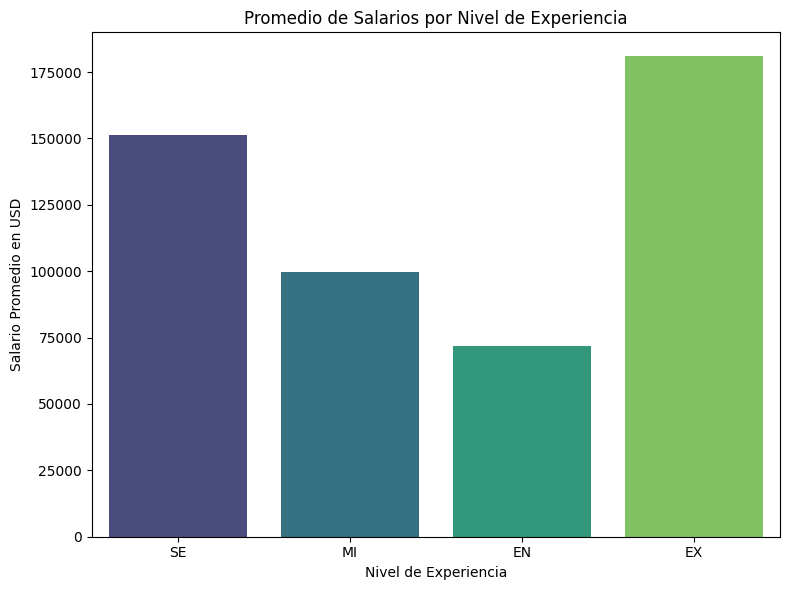

In [77]:
# Gráfico de barras sin intervalos de confianza y con 'hue' asignado a 'experience_level'
plt.figure(figsize=(8, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df_limpio, estimator='mean', errorbar=None, hue='experience_level', palette="viridis", legend=False)
plt.title('Promedio de Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario Promedio en USD')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


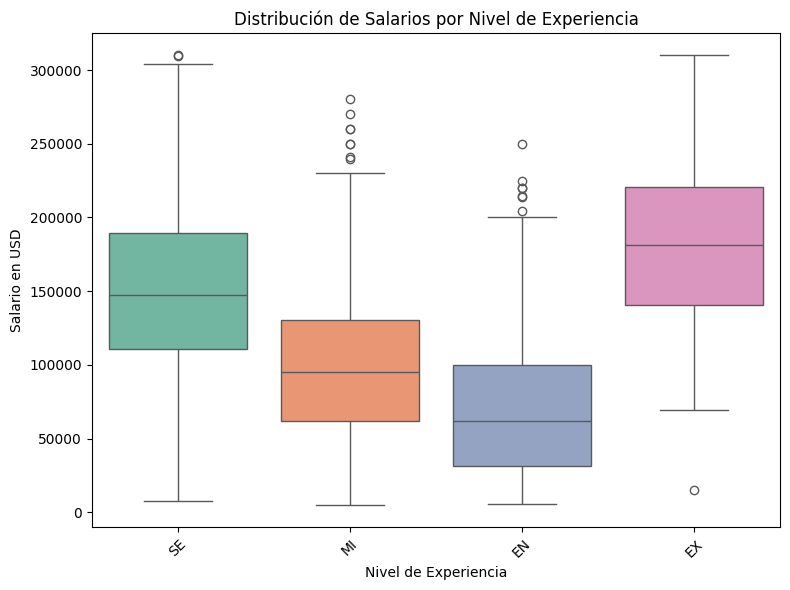

In [79]:
# Diagrama de caja para mostrar la distribución del salario por nivel de experiencia
plt.figure(figsize=(8,6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_limpio, hue='experience_level', palette="Set2", legend=False)
plt.title('Distribución de Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Conclusion:

Al comparar los dos gráficos que has generado, podemos hacer una breve interpretación y deducir varios puntos clave sobre la distribución de los salarios por nivel de experiencia.

### 1. Diagrama de caja (Boxplot):

Distribución por nivel de experiencia: El boxplot muestra la distribución de los salarios en función del nivel de experiencia. Aquí, podemos observar las siguientes características:

Valores atípicos (outliers): Los valores atípicos son más evidentes en los niveles de entrada (EN) y medio (MI). En el nivel de entrada (EN), los salarios se extienden hasta un valor máximo de 250,000 USD, lo que es inusual para este nivel de experiencia. Del mismo modo, en MI hay algunos valores atípicos por encima de los 280,000 USD.

Rangos intercuartílicos (IQR): Los rangos IQR (cuartil 75% - cuartil 25%) son relativamente amplios para los niveles EN y MI, lo que indica una mayor dispersión en los salarios de estos grupos. Esto podría sugerir que los salarios son muy variables o que algunos individuos tienen un salario inusualmente alto para su nivel.

Mediana y cuartiles: La mediana de los salarios (línea dentro de la caja) es más alta en niveles superiores como SE (Senior) y EX (Executive), lo que refleja que los salarios aumentan significativamente con el nivel de experiencia.

### 2. Gráfico de barras (Barplot):

Promedio de salarios por nivel de experiencia: El gráfico de barras muestra el promedio de los salarios para cada nivel de experiencia. A partir de este gráfico, podemos ver que:

Tendencia ascendente: Los salarios promedio aumentan significativamente a medida que se sube en el nivel de experiencia, desde un promedio de aproximadamente 71,803 USD en el nivel de entrada (EN) hasta un promedio de 180,907 USD en el nivel ejecutivo (EX).

Comparación de promedios: Esto indica que los niveles más altos de experiencia, como el nivel ejecutivo (EX), tienen salarios mucho más altos en comparación con los niveles de entrada (EN) y medio (MI). Sin embargo, el nivel de experiencia intermedio (MI) muestra un salario promedio notablemente más bajo que el nivel senior (SE), aunque más alto que el nivel de entrada (EN).